# Planets
* [Analiz](#1)
* [Görselleştirme](#2)

<a id="1"></a> <br>
## Analiz

In [2]:
# kütüphanelerin import edilmesi
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# veri setinin import edilip kullanıma hazır hale getirilmesi
planets = sns.load_dataset("planets")
df = planets.copy()

In [4]:
# veri setine ilk bakış
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### Veri Setinin Hikayesi
**NASA tarafından keşfedilen galaksiler ve onların özelliklerini içeren veri setidir.**
* **method**: galaksinin keşfedilme yöntemi
* **number**: galaksideki gezegen sayısı
* **orbital_period**: galaksideki gezegenlerin yörüngesini tamamlaması için gereken süre
* **mass**: galaksinin kütlesi
* **distance**: galaksinin uzaklığı
* **year**: galaksinin keşfedildiği sene

In [5]:
# veri setinin son 5 gözlemi
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [6]:
# veri setinin yapısal bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


* DataFrame
* 1035 gözlem içeriyor
* 6 değişkenden oluşuyor (3 tanesi float, 2 tanesi integer ve 1 tanesi object)
* Bellekte 48.6+ KB yer kaplıyor

In [7]:
# veri setindeki değişkenlerin veri tipleri
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [8]:
# veri setindeki object veri tipindeki değişkenin category veri tipine dönüşümü
df.method = pd.Categorical(df.method)

In [9]:
# veri setinin gözlem ve değişken sayısı
df.shape
print(f"Veri setinde {df.shape[0]} adet gözlem ve {df.shape[1]} adet değişken var")

Veri setinde 1035 adet gözlem ve 6 adet değişken var


In [10]:
# veri setindeki değişken isimleri
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [11]:
# veri setindeki betimsel istatistikler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


* kayıtlı ilk keşif 1989 yılında yapılmış
* en fazla gezegenli galakside 7 tane gezegen var
* orbital period çok değişkenlik gösteriyor

In [12]:
# eksik değer var mı?
df.isnull().values.any() # var

True

In [13]:
# hangi değişkende kaçar tane eksik veri var
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

* 522 galaksinin kütlesi eksik
* 227 galaksinin uzaklığı bilinmiyor

In [14]:
# kategorik değişkenler
kat_df = df.select_dtypes(include = ["category"])

In [15]:
# kategorik değişkenlerin sınıflarına erişmek
kat_df.method.values.unique()

[Radial Velocity, Imaging, Eclipse Timing Variations, Transit, Astrometry, Transit Timing Variations, Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]
Categories (10, object): [Radial Velocity, Imaging, Eclipse Timing Variations, Transit, ..., Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]

In [16]:
# kategorik değişkenlerin sınıf sayısına erişmek
kat_df.method.value_counts().count()

10

In [17]:
# kategorik değişkenlerin sınıf frekansına erişmek
kat_df.method.value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

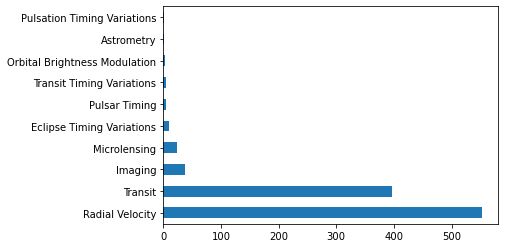

In [18]:
# kategorik değişenlerin sınıf frekansını grafiğe dökmek
kat_df.method.value_counts().plot.barh();

In [19]:
# nümerik değişkenler
num_df = df.select_dtypes(include = ["float64","int64"])

In [20]:
# nümerik değişkenlerin betimsel istatistikleri
num_df.describe().T
print(f"En fazla gezegene sahip galaksideki gezegen sayısı: {num_df.number.max()}")
print(f"En erken keşfedilen galaksinin keşfedilme senesi: {num_df.year.min()}")
print(f"Galaksilerin ortalama kütlesi: {num_df.mass.mean()}")

En fazla gezegene sahip galaksideki gezegen sayısı: 7
En erken keşfedilen galaksinin keşfedilme senesi: 1989
Galaksilerin ortalama kütlesi: 2.6381605847953233


<a id="2"></a> <br>
## Görselleştirme

In [21]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [22]:
num_df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


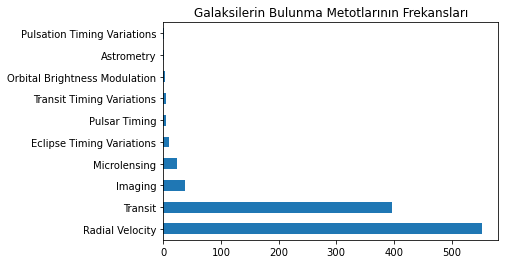

In [56]:
# kategorik değişkenin sınıflarınıb frekanslarını görselleştirmek
(df.method
 .value_counts()
 .plot.barh()
 .set_title("Galaksilerin Bulunma Metotlarının Frekansları")
);

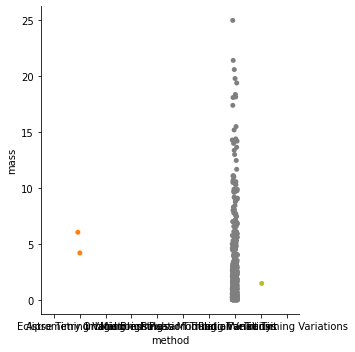

In [57]:
# veri setinde yer alan değişkenlerin birlikte değerlendirilmesi
sns.catplot(x = "method", y = "mass", data = df);

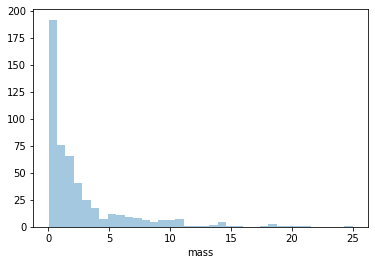

In [60]:
# nümerik değişkenin histogramı
sns.distplot(df.mass, kde = False);

* Kütlenin büyük çoğunluğu 0 ile 5 birim arasında dağılmış

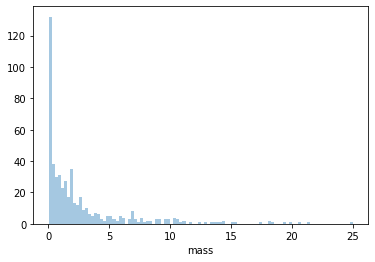

In [61]:
# nümerik değişkenin hassas histogramı
sns.distplot(df.mass, bins = 100, kde = False);

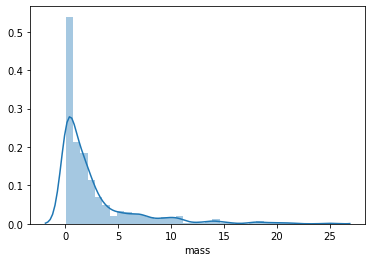

In [62]:
# histogram ve yoğunluk grafiği
sns.distplot(df.mass);

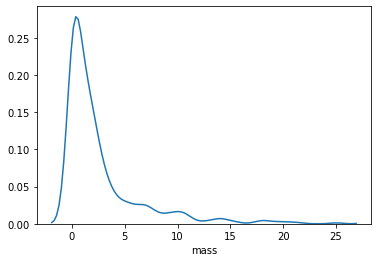

In [63]:
# yoğunluk grafiği
sns.distplot(df.mass, hist = False);

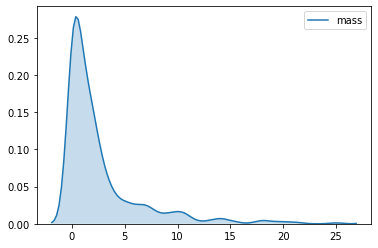

In [64]:
# karalı yoğunluk grafiği
sns.kdeplot(df.mass, shade = True);

C:\Users\ebast\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


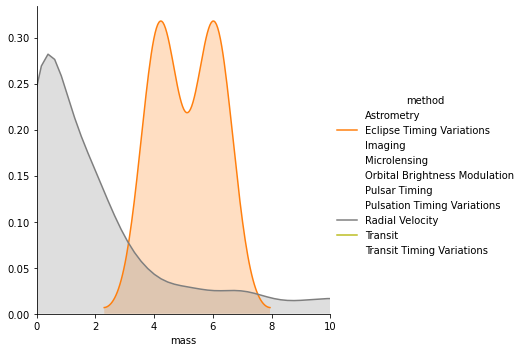

In [65]:
# grafiğe yakından ve daha detaylı bakmak
(sns
 .FacetGrid(df, 
            hue = "method", 
            height = 5, 
            xlim = (0, 10))
 .map(sns.kdeplot, "mass", shade = True)
 .add_legend()
);

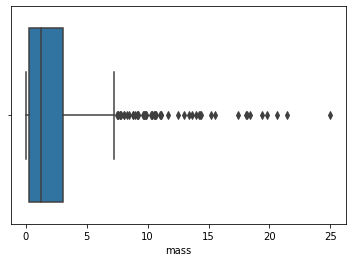

In [66]:
# kutu grafiği - yatay
sns.boxplot(x = df.mass);

* çok fazla aykırı değer var

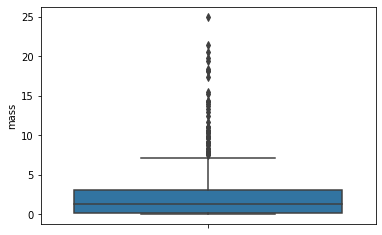

In [67]:
# kutu grafiği - dikey
sns.boxplot(x = df.mass, orient = "v");